# Times dependence on the reaction saturations #

In [8]:
%matplotlib notebook
from LinearChain import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.integrate import ode
from scipy.integrate import quad
from scipy import stats
import pandas as pd


## Parameters ##

In [2]:
a = 2
b = 1
KS = 2
KP = 2
N = 30
beta = b*KP
concSS = 1

KSes = 10**np.arange(0,-4.1,-0.05)

## Run ##

In [3]:
data = pd.DataFrame({"tau_c":np.zeros(len(KSes)),"T_c":np.zeros(len(KSes)),"tau_t":np.zeros(len(KSes)),"T_t":np.zeros(len(KSes)),"saturation":np.zeros(len(KSes))})
data.index = np.array(KSes)

for KS in KSes:    
    alpha = a*KS
    F = (alpha*concSS/KS - beta*concSS/KS)/(1 + concSS/KS + concSS/KS)
    S = (1 + concSS/KS + concSS/KP)
    A_c = (alpha-F)/(S*KS)
    A_t = alpha/(S*KS)
    B_c = (beta+F)/(S*KP)
    B_t = beta/(S*KP)

    param_vec_c = np.array([A_c,B_c]*(N+1)) 
    param_vec_t = np.array([A_t,B_t]*(N+1))
    J_c = compute_jacobian(N,param_vec_c)
    J_t = compute_jacobian(N,param_vec_t)
    data.loc[KS].tau_c = 1/(A_c+B_c - 2*np.sqrt(A_c*B_c)*np.cos(np.pi/(N+1)))
    data.loc[KS].T_c = compute_lifetime(J_c,norm_type=1)
    data.loc[KS].tau_t = 1/(A_t+B_t - 2*np.sqrt(A_t*B_t)*np.cos(np.pi/(N+1)))
    data.loc[KS].T_t = compute_lifetime(J_t,norm_type=1)

    data.loc[KS].saturation = S

## Plot ##

<IPython.core.display.Javascript object>


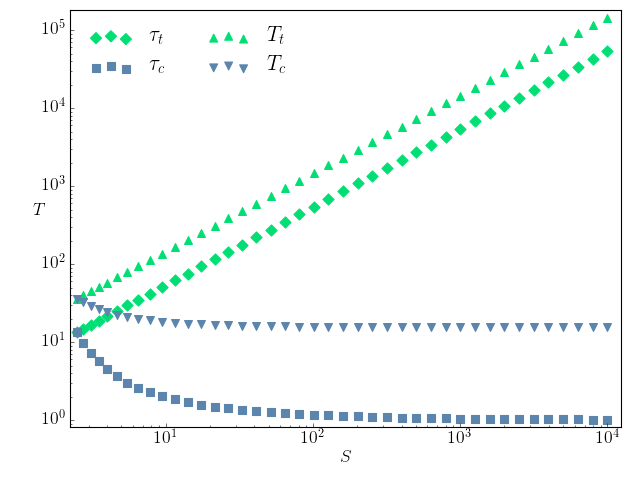

In [15]:
exec(open("fig_settings.py").read())
fig = plt.figure()
select_points = KSes[np.arange(0,len(data.saturation),2)]

ax = fig.add_axes([0.11, 0.11, 0.86, 0.87])#([0.11, 0.13, 0.86, 0.85])
ax.yaxis.labelpad = 4
ax.xaxis.labelpad = 2
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.scatter(data.saturation[select_points],data.tau_t[select_points],label=r"$\tau_t$",marker="D",s=ms_size,color=mygreen)
ax.scatter(data.saturation[select_points],data.tau_c[select_points],label=r"$\tau_c$",marker="s",s=ms_size,color=myblue)
ax.scatter(data.saturation[select_points],data.T_t[select_points],label=r"$T_t$",marker="^",s=ms_size,color=mygreen)
ax.scatter(data.saturation[select_points],data.T_c[select_points],label=r"$T_c$",marker="v",s=ms_size,color=myblue)
ax.legend(loc=2,ncol=2,frameon=0,framealpha=0)
ax.set_xlabel(r'$S$',color = text_color)
ax.set_ylabel(r'$T$',rotation=0,color = text_color)
vec = np.ravel([data.tau_c,data.tau_t,data.T_t,data.T_c])
ylim_up = 10**(np.log10(np.max(vec))*1.01)
xlim_up = np.max(data.saturation)*1.1
ylim_down = np.min(vec)*0.8
xlim_down = np.min(data.saturation)*0.9
ax.set_xlim([xlim_down,xlim_up])
ax.set_ylim([ylim_down,ylim_up])
ax.set_xscale('log')
ax.set_yscale('log')
fig.show()
fig.savefig("./figures/lifetime_vs_satur.pdf")